## Pytorch - Nesterov Algorithm

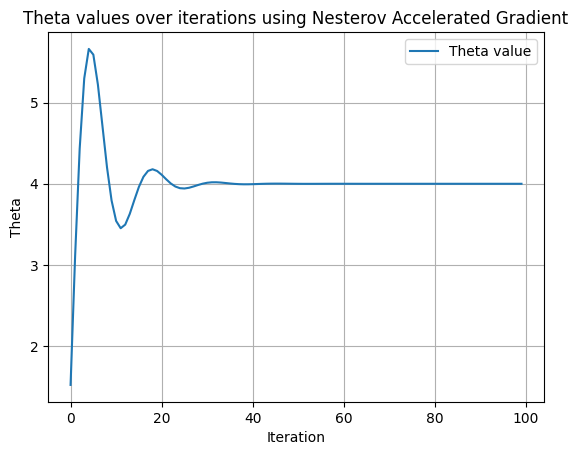

In [2]:
import torch
import matplotlib.pyplot as plt

# Define the variable theta as a tensor that requires gradient
theta = torch.tensor([0.0], requires_grad=True)

# Define the loss function (the function we want to minimize)
def loss_fn(theta):
    return (theta - 4)**2

# Optimizer with Nesterov Accelerated Gradient
optimizer = torch.optim.SGD([theta], lr=0.1, momentum=0.9, nesterov=True)

# List to store theta values for each iteration
theta_values = []

# Training loop
for epoch in range(100):  # number of training epochs
    # Calculate the loss
    loss = loss_fn(theta)
    
    # Backward step: calculate gradients
    optimizer.zero_grad()  # Reset gradients
    loss.backward()        # Backpropagation to calculate gradients
    
    # Update parameters
    optimizer.step()       # Update theta using NAG
    
    # Store the current value of theta
    theta_values.append(theta.item())

# Plot theta values over iterations
plt.plot(theta_values, label="Theta value")
plt.xlabel("Iteration")
plt.ylabel("Theta")
plt.title("Theta values over iterations using Nesterov Accelerated Gradient")
plt.legend()
plt.grid(True)
plt.show()

## Nesterov accelerated Gradient - From Scratch

Valor final de theta: 4.0000


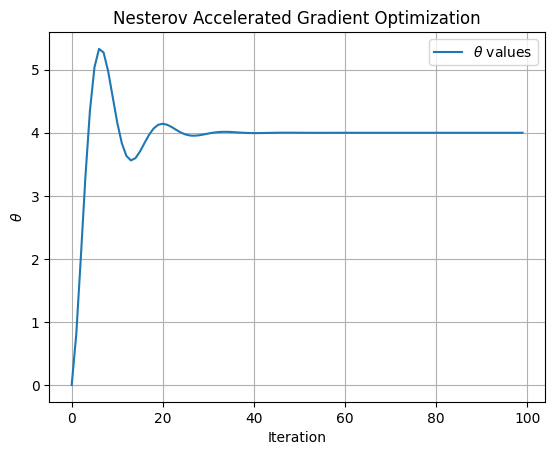

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function f(theta) = (theta - 4)^2
def f(theta):
    return (theta - 4) ** 2

# Define the derivative of the cost function
def df(theta):
    return 2 * (theta - 4)

# Nesterov Accelerated Gradient Algorithm
def nesterov_accelerated_gradient(theta_init, lr, gamma, num_iterations):
    theta = theta_init
    v = 0  # Initialize momentum
    theta_values = []  # To store theta values at each iteration

    for i in range(num_iterations):
        theta_values.append(theta)
        
        # Prediction (look-ahead step)
        theta_future = theta - gamma * v
        
        # Gradient calculated at the anticipated position
        gradient = df(theta_future)
        
        # Update momentum
        v = gamma * v + lr * gradient
        
        # Update theta
        theta = theta - v

    return theta, theta_values

# Algorithm parameters
theta_init = 0.0  # Initial value of theta
learning_rate = 0.1  # Learning rate
momentum = 0.9  # Momentum factor (gamma)
iterations = 100  # Number of iterations

# Run the NAG algorithm
theta_final, theta_values = nesterov_accelerated_gradient(
    theta_init, learning_rate, momentum, iterations)

# Results
print(f'Final value of theta: {theta_final:.4f}')

# Plot theta values over iterations
plt.plot(theta_values, label=r'$\theta$ values')
plt.xlabel('Iteration')
plt.ylabel(r'$\theta$')
plt.title('Nesterov Accelerated Gradient Optimization')
plt.legend()
plt.grid(True)
plt.show()

## Numerical Solution - RK45

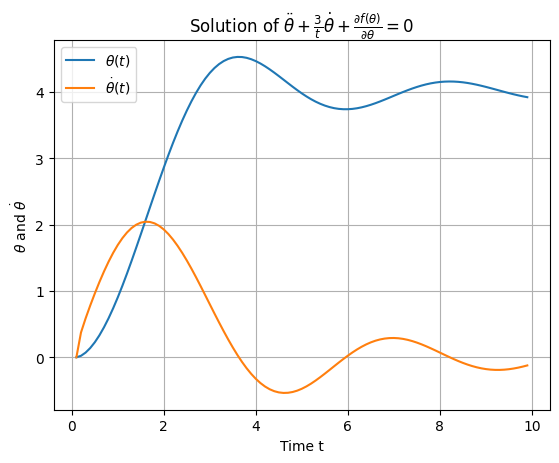

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the derivative of the function f(theta) = (theta - 4)^2
def df_dtheta(theta):
    return 2 * (theta - 4)

# Define the system of first-order ODEs
def system(t, y):
    theta1, theta2 = y
    dtheta1_dt = theta2
    dtheta2_dt = - (3 / t) * theta2 - df_dtheta(theta1)
    return [dtheta1_dt, dtheta2_dt]

# Define the initial conditions
theta_initial = 0.0  # initial value of theta
theta_dot_initial = 0.0  # initial value of theta_dot

# Initial conditions vector
y0 = [theta_initial, theta_dot_initial]

# Define the time span for the solution
lr = 0.1
t_span = (0.1, 10)  # start from t=0.1 to avoid division by zero
t_eval = np.arange(0.1, 10, lr)

# Solve the system of ODEs
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')

# Plot the results
plt.plot(sol.t, sol.y[0], label=r'$\theta(t)$')
plt.plot(sol.t, sol.y[1], label=r'$\dot{\theta}(t)$')
plt.xlabel('Time t')
plt.ylabel(r'$\theta$ and $\dot{\theta}$')
plt.title(r'Solution of $\ddot{\theta} + \frac{3}{t} \dot{\theta} + \frac{\partial f(\theta)}{\partial \theta} = 0$')
plt.legend()
plt.grid(True)
plt.show()


## Numerical Solutions - Euler's Method

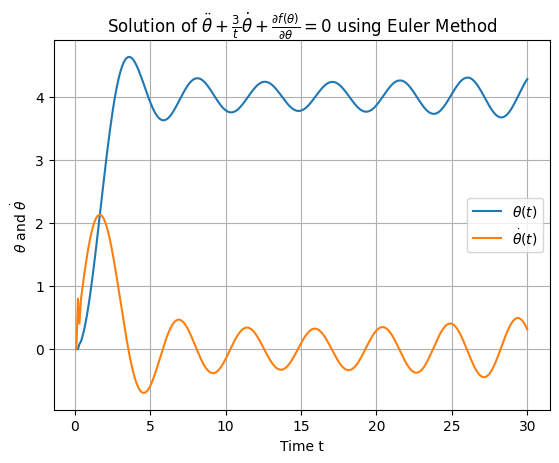

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the derivative of the function f(theta) = (theta - 4)^2
def df_dtheta(theta):
    return 2 * (theta - 4)

# Define the system of first-order ODEs
def system(t, theta1, theta2):
    dtheta1_dt = theta2
    dtheta2_dt = - (3 / t) * theta2 - df_dtheta(theta1)
    return dtheta1_dt, dtheta2_dt

# Define the initial conditions
theta_initial = 0.0  # initial value of theta
theta_dot_initial = 0.0  # initial value of theta_dot

# Time span for the solution
t_start = 0.1  # start time to avoid division by zero
t_end = 30.0  # end time
dt = 0.1  # time step

# Number of steps
n_steps = int((t_end - t_start) / dt)

# Initialize arrays to store the solution
t_values = np.linspace(t_start, t_end, n_steps)
theta_values = np.zeros(n_steps)
theta_dot_values = np.zeros(n_steps)

# Set initial conditions
theta_values[0] = theta_initial
theta_dot_values[0] = theta_dot_initial

# Euler's method to solve the system
for i in range(1, n_steps):
    t = t_values[i - 1]
    theta1 = theta_values[i - 1]
    theta2 = theta_dot_values[i - 1]
    
    dtheta1_dt, dtheta2_dt = system(t, theta1, theta2)
    
    theta_values[i] = theta1 + dt * dtheta1_dt
    theta_dot_values[i] = theta2 + dt * dtheta2_dt

# Plot the results
plt.plot(t_values, theta_values, label=r'$\theta(t)$')
plt.plot(t_values, theta_dot_values, label=r'$\dot{\theta}(t)$')
plt.xlabel('Time t')
plt.ylabel(r'$\theta$ and $\dot{\theta}$')
plt.title(r'Solution of $\ddot{\theta} + \frac{3}{t} \dot{\theta} + \frac{\partial f(\theta)}{\partial \theta} = 0$ using Euler Method')
plt.legend()
plt.grid(True)
plt.show()
